# CAPSTONE PROJECT
We are going to build a `plant type` classifier model. There are 10 classes in the plant image dataset: banana, coffee, corn, grape, guava, mango, paddy, potato, tea, and tobacco.

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from mpl_toolkits.axes_grid1 import ImageGrid

## Dataset


In [ ]:
data_path = '/content/drive/MyDrive/Capstone Project/Plant Type Classification'

TRAIN_DIR = '/content/drive/MyDrive/Capstone Project/Plant Type Classification/Training'
VAL_DIR = '/content/drive/MyDrive/Capstone Project/Plant Type Classification/Validation'

# BANANA
TRAIN_BANANA_DIR = os.path.join(TRAIN_DIR, "Banana/")
VAL_BANANA_DIR = os.path.join(VAL_DIR, "Banana/")

# COFFEE
TRAIN_COFFEE_DIR = os.path.join(TRAIN_DIR, "Coffee/")
VAL_COFFEE_DIR = os.path.join(VAL_DIR, "Coffee/")

# CORN
TRAIN_CORN_DIR = os.path.join(TRAIN_DIR, "Corn/")
VAL_CORN_DIR = os.path.join(VAL_DIR, "Corn/")

# GRAPE
TRAIN_GRAPE_DIR = os.path.join(TRAIN_DIR, "Grape/")
VAL_GRAPE_DIR = os.path.join(VAL_DIR, "Grape/")

# GUAVA
TRAIN_GUAVA_DIR = os.path.join(TRAIN_DIR, "Guava/")
VAL_GUAVA_DIR = os.path.join(VAL_DIR, "Guava/")

# MANGO
TRAIN_MANGO_DIR = os.path.join(TRAIN_DIR, "Mango/")
VAL_MANGO_DIR = os.path.join(VAL_DIR, "Mango/")

# PADDY
TRAIN_PADDY_DIR = os.path.join(TRAIN_DIR, "Paddy/")
VAL_PADDY_DIR = os.path.join(VAL_DIR, "Paddy/")

# POTATO
TRAIN_POTATO_DIR = os.path.join(TRAIN_DIR, "Potato/")
VAL_POTATO_DIR = os.path.join(VAL_DIR, "Potato/")

# TEA
TRAIN_TEA_DIR = os.path.join(TRAIN_DIR, "Tea/")
VAL_TEA_DIR = os.path.join(VAL_DIR, "Tea/")

#TOBACCO
TRAIN_TOBACCO_DIR = os.path.join(TRAIN_DIR, "Tobacco/")
VAL_TOBACCO_DIR = os.path.join(VAL_DIR, "Tobacco/")

In [ ]:
# Number of images in training directory
PLANT_CATEGORIES = ['Banana', 'Coffee', 'Corn', 'Grape', 'Guava', 'Mango', 'Paddy', 'Potato', 'Tea', 'Tobacco']
for category in PLANT_CATEGORIES:
    print('There are {} {} images for training'.format(category, len(os.listdir(os.path.join(TRAIN_DIR, category)))))

There are Banana 141 images for training
There are Coffee 80 images for training
There are Corn 90 images for training
There are Grape 1362 images for training
There are Guava 86 images for training
There are Mango 400 images for training
There are Paddy 1411 images for training
There are Potato 240 images for training
There are Tea 80 images for training
There are Tobacco 200 images for training


In [ ]:
# Number of images in validation directory
for category in PLANT_CATEGORIES:
    print('There are {} {} images for validation'.format(category, len(os.listdir(os.path.join(VAL_DIR, category)))))

There are Banana 35 images for validation
There are Coffee 20 images for validation
There are Corn 20 images for validation
There are Grape 340 images for validation
There are Guava 21 images for validation
There are Mango 100 images for validation
There are Paddy 353 images for validation
There are Potato 60 images for validation
There are Tea 20 images for validation
There are Tobacco 50 images for validation


Sample guava image:


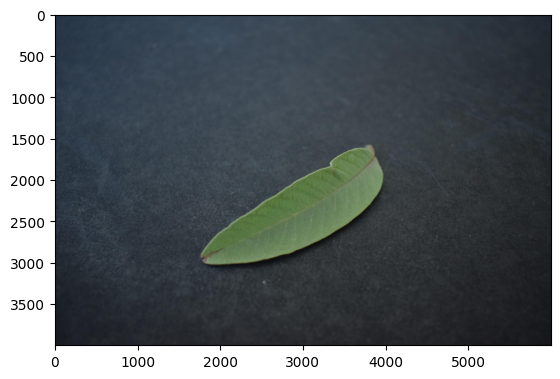

In [ ]:
print("Sample guava image:")
plt.imshow(load_img(f"{os.path.join(TRAIN_GUAVA_DIR, os.listdir(TRAIN_GUAVA_DIR)[0])}"))
plt.show()

## Training and Validation Generator

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  
  train_generator = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                                      batch_size=32,
                                                      class_mode = 'sparse', 
                                                      target_size=(128, 128),
                                                      shuffle=False)

  
  validation_datagen = ImageDataGenerator(rescale=1./255)

  
  validation_generator = validation_datagen.flow_from_directory(directory=VAL_DIR,
                                                                batch_size=32,
                                                                class_mode = 'sparse', 
                                                                target_size=(128, 128),
                                                                shuffle=False)

  return train_generator, validation_generator

In [ ]:
# Testing generators
train_generator, validation_generator = train_val_generators(TRAIN_DIR, VAL_DIR)

Found 4090 images belonging to 10 classes.
Found 1019 images belonging to 10 classes.


## Transfer Learning with InceptionV3

In [ ]:
# InceptionV3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-05-24 20:24:46--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   134MB/s    in 0.6s    

2023-05-24 20:24:47 (134 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
# Base Model
base_model = InceptionV3(input_shape = (128, 128, 3),
                                  include_top = False, 
                                  weights = None) 

base_model.load_weights(local_weights_file)

In [ ]:
# Trainable Layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
last_output = base_model.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10, activation = 'softmax')(x)        

# Create the complete model by using the Model class
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [ ]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [ ]:
# Train only the last 4 layers
for layer in model.layers[:310]:
   layer.trainable = False
for layer in model.layers[310:]:
   layer.trainable = True

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0002, momentum=0.9),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

In [ ]:
# Training model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
128/128 [==============================] - 1123s 9s/step - loss: 0.6408 - accuracy: 0.8306 - val_loss: 0.2384 - val_accuracy: 0.9274
Epoch 2/15
128/128 [==============================] - 227s 2s/step - loss: 0.1599 - accuracy: 0.9531 - val_loss: 0.1367 - val_accuracy: 0.9607
Epoch 3/15
128/128 [==============================] - 224s 2s/step - loss: 0.1154 - accuracy: 0.9655 - val_loss: 0.1124 - val_accuracy: 0.9647
Epoch 4/15
128/128 [==============================] - 225s 2s/step - loss: 0.1021 - accuracy: 0.9685 - val_loss: 0.0949 - val_accuracy: 0.9706
Epoch 5/15
128/128 [==============================] - 224s 2s/step - loss: 0.0823 - accuracy: 0.9760 - val_loss: 0.0964 - val_accuracy: 0.9657
Epoch 6/15
128/128 [==============================] - 224s 2s/step - loss: 0.0711 - accuracy: 0.9792 - val_loss: 0.0743 - val_accuracy: 0.9784
Epoch 7/15
128/128 [==============================] - 224s 2s/step - loss: 0.0630 - accuracy: 0.9817 - val_loss: 0.0720 - val_accuracy: 0.976

## Evaluating Model

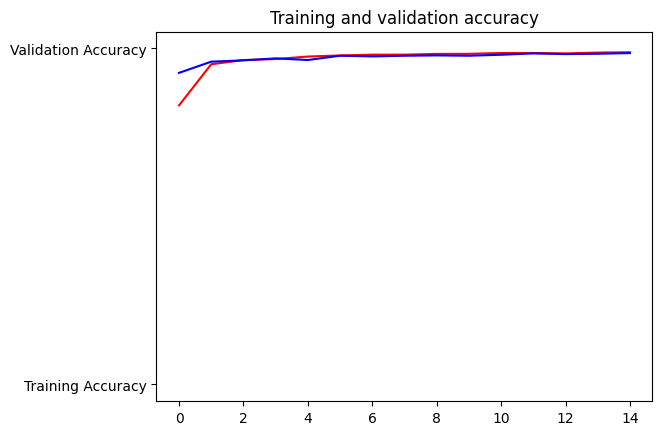

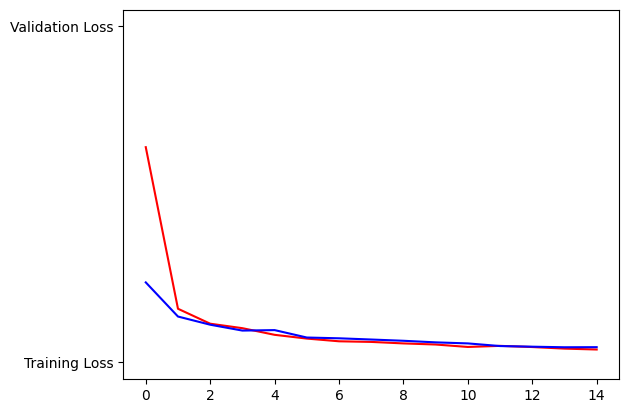

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# Graph of training and validation accuracy
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

# Graph of training and validation loss
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

## Saving Model

In [ ]:
model.save('/content/drive/MyDrive/Capstone Project/Plant_Classification_TF')

In [ ]:
model.save('/content/drive/MyDrive/Capstone Project/Plant_Classification_TF.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Capstone Project/Plant_Classification_TF.h5')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

## Export The Model

In [ ]:
RPS_SAVED_MODEL = "rps_saved_model"

In [ ]:
# Export the SavedModel
tf.saved_model.save(model, RPS_SAVED_MODEL)

In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 128, 128, 3)
      name: serving_default_input_1:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 10)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


2023-05-24 21:44:19.387868: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'input_1': TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_1')})
{'dense_1': TensorSpec(shape=(None, 10), dtype=tf.float32, name='dense_1')}


## Convert Model using TFLite's Converter

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model_TF.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
try:
    from google.colab import files
    files.download('converted_model_TF.tflite')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-44-93afbd6d8b7a>:39: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
Confusion matrix, without normalization
Classification Report
              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00        35
      Coffee       1.00      1.00      1.00        20
        Corn       0.95      0.95      0.95        20
       Grape       0.98      1.00      0.99       340
       Guava       1.00      1.00      1.00        21
       Mango       0.97      1.00      0.99       100
       Paddy       1.00      1.00      1.00       353
      Potato       1.00      0.92      0.96        60
         Tea       0.91      1.00      0.95        20
     Tobacco       1.00      0.84      0.91        50

    accuracy                           0.99      1019
   macro avg       0.98      0.97      0.97      1019
weighted avg       0.99      0.99      0.99      1019



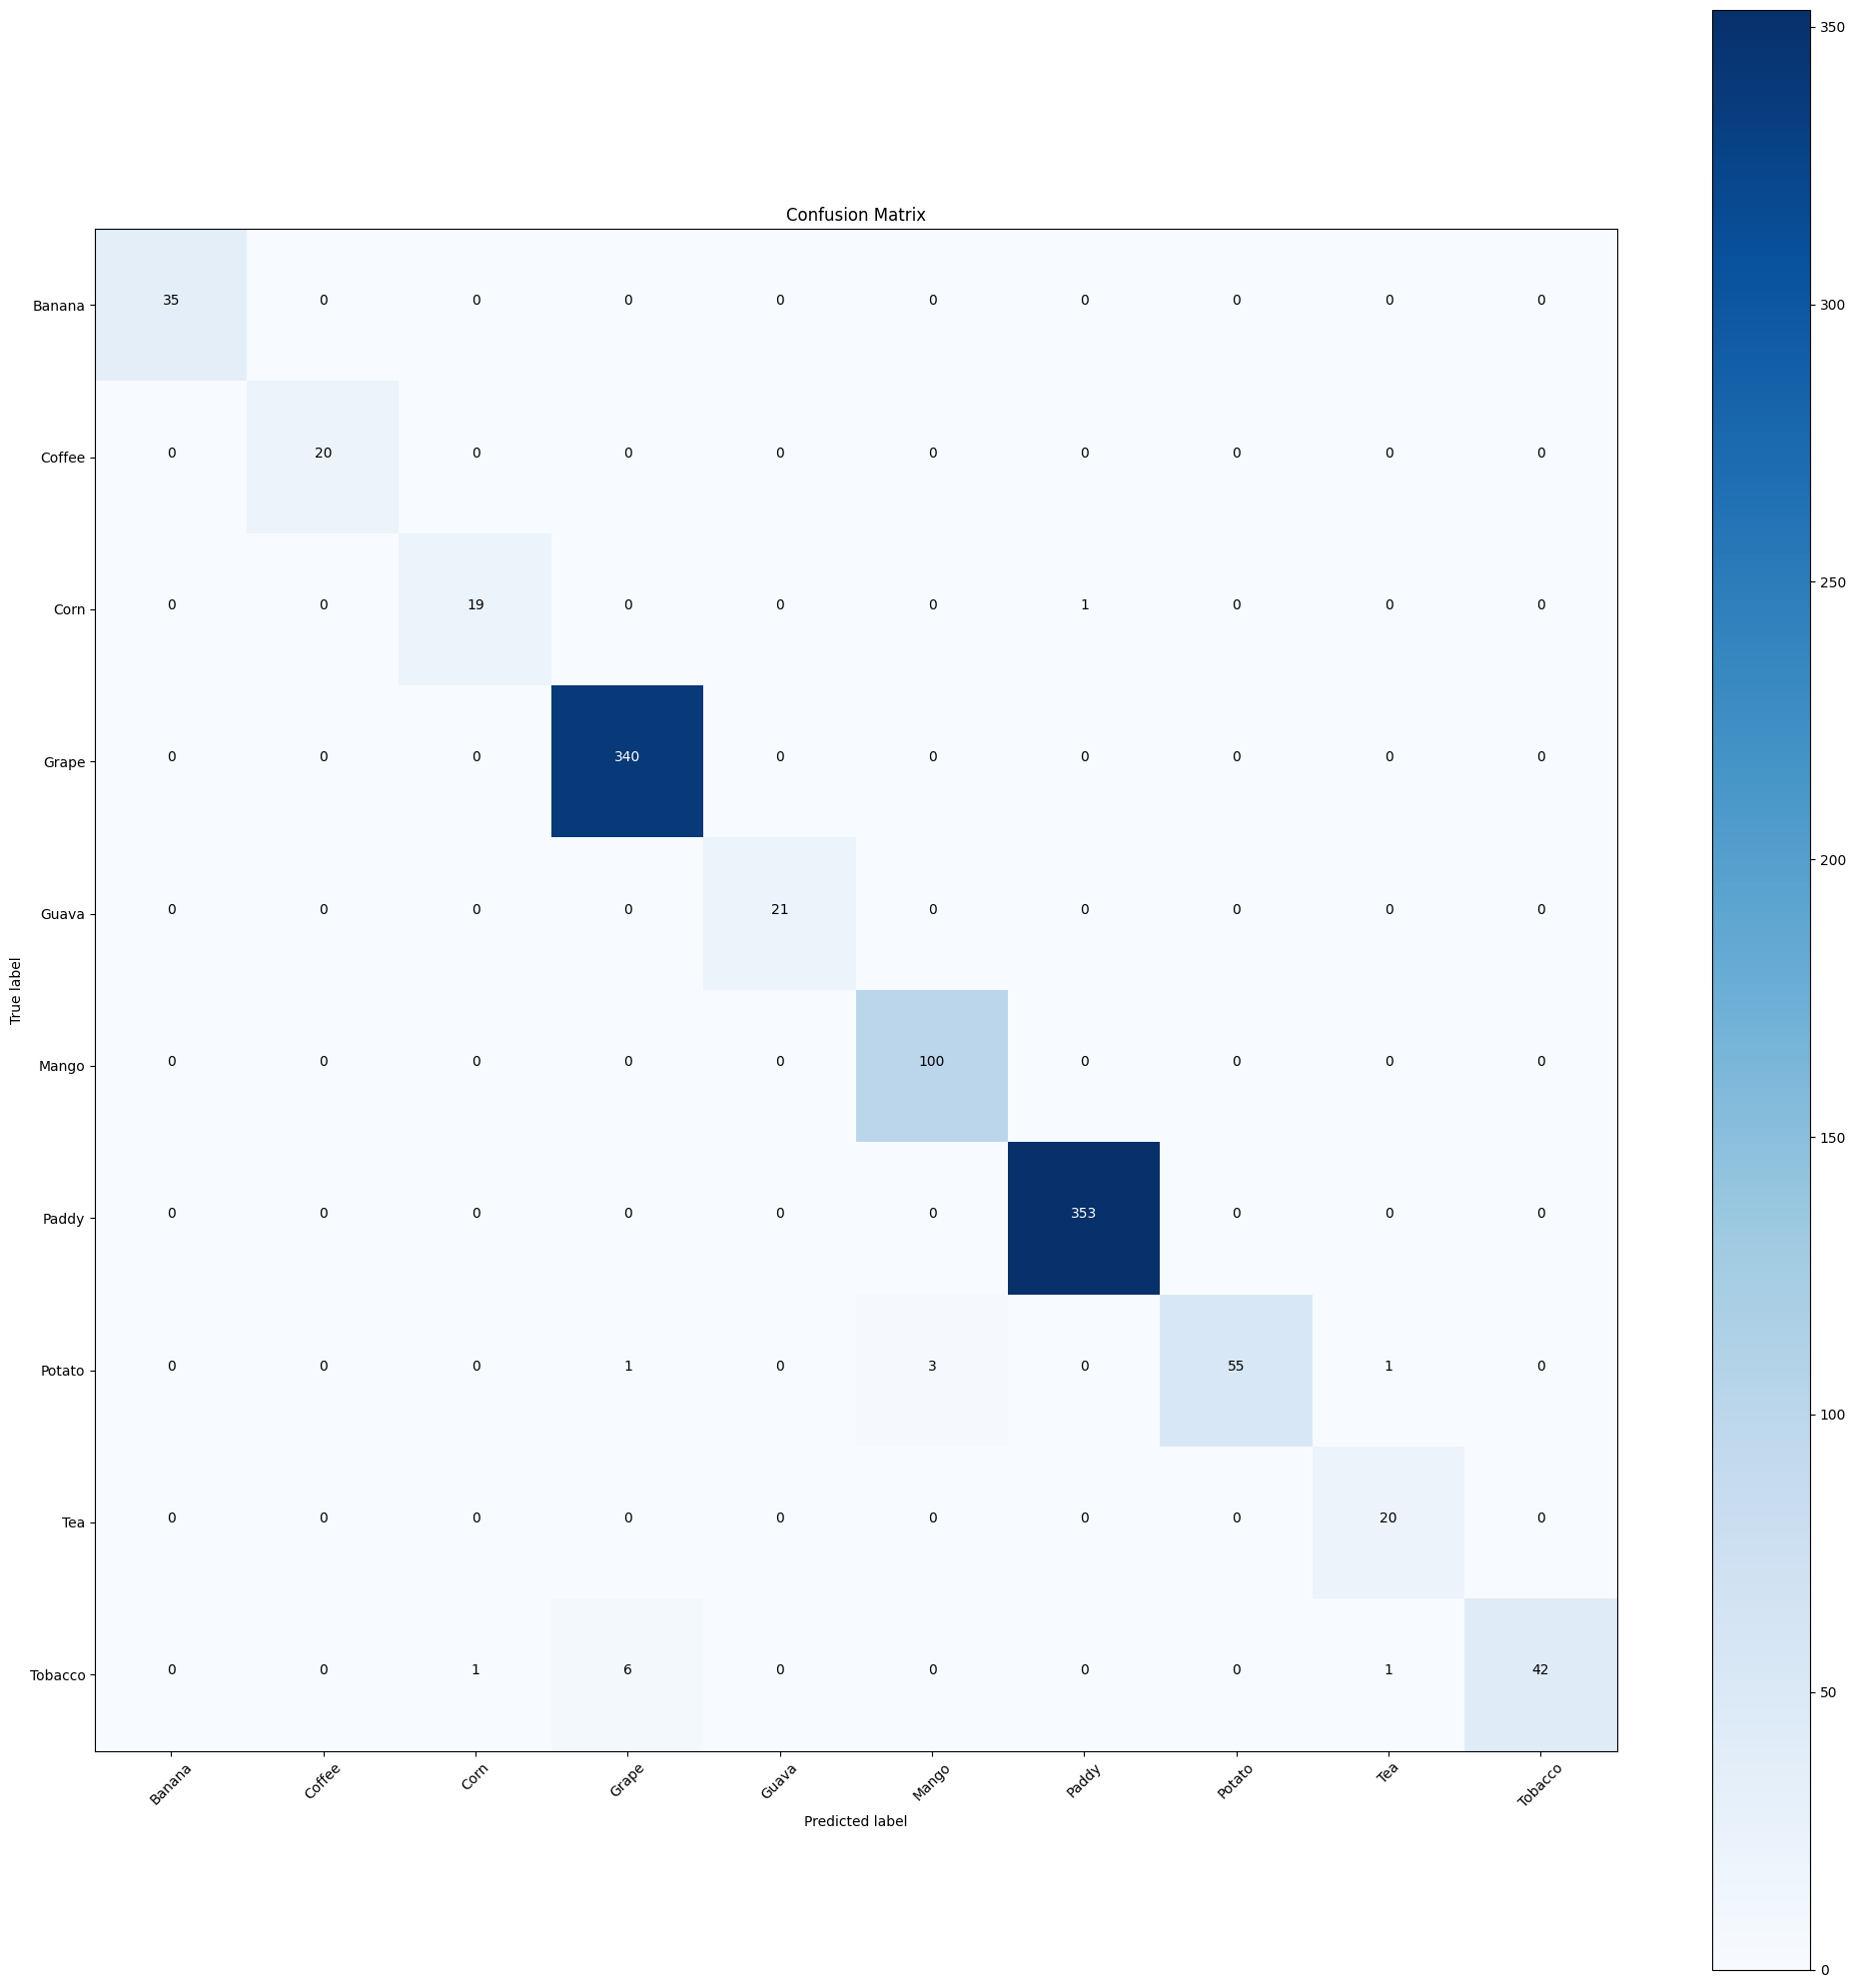

In [ ]:
#Plot the confusion matrix
import numpy as np
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))